1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

Ans- Anomaly Detection is the process of identifying data points or patterns that deviate significantly from the "normal" behavior of a dataset.

**Types of Anomalies**

Point Anomalies A single data point is outlier relative to the rest of the data.

Example: A single credit card transaction for $50,000 in a history of $20–$100 purchases.

Contextual (Conditional) Anomalies An observation is anomalous only within a specific context (e.g., time or location).

Example: A temperature of 30°C is normal in summer but an anomaly in the middle of winter.

Collective Anomalies A group of related data points is anomalous, even if individual points are not.

Example: A sequence of small, repeated login attempts occurring in milliseconds, indicating a brute-force attack.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

Ans- **Isolation Forest**

Approach: Isolation. It builds random decision trees; anomalies are isolated quickly and have shorter paths.

Use Case: Large, high-dimensional datasets for global fraud detection.

DBSCAN
**bold text**
Approach: Density-based Clustering. It groups dense points and labels sparse, isolated points as "noise."

Use Case: Data with clusters of irregular shapes where noise must be separated.

**Local Outlier Factor (LOF)**

Approach: Relative Density. It identifies points with significantly lower density than their immediate neighbors.

Use Case: Datasets with varying densities where an anomaly is local to a specific group.

3. What are the key components of a Time Series? Explain each with one
example.

Ans- Key components of a Time Series:

1. Trend The long-term increase or decrease in the data over time.

Example: The steady rise in global temperatures over the last century.

2. Seasonality Repeating patterns that occur at fixed intervals (e.g., daily, weekly, or monthly).

Example: A surge in retail sales every December during the holiday season.

3. Cyclicity Fluctuations that occur without a fixed frequency, often related to economic or business cycles.

Example: The rise and fall of the housing market over several years.

4. Irregularity (Noise) Random, unpredictable variations that do not follow a pattern.

Example: A sudden drop in stock prices due to an unexpected political event.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Ans- Testing and Transformation Summary

Definition: A series is Stationary when its mean, variance, and covariance remain constant over time.

**Tests:**

ADF (Augmented Dickey-Fuller) Test: Statistical test; $p \text{-value} \le 0.05$ indicates stationarity.

KPSS Test: Complements ADF; null hypothesis is that the series is stationary.

Rolling Statistics: Plotting moving average and moving standard deviation.

**Transformations:**

Differencing: $y'_t = y_t - y_{t-1}$ (removes trend).

Log/Power Transform: Stabilizes variance.

Seasonal Differencing: $y'_t = y_t - y_{t-s}$ (removes seasonality).

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Ans- **AR (AutoRegressive)**

Structure: Predicts future values based on a linear combination of its own past values (1$p$).

Application: Used for data where future values depend strictly on previous observations.

**MA (Moving Average)**

Structure: Predicts future values based on past forecast errors (4$q$).

Application: Used to model short-term shocks or "noise" that returns to the mean.

**ARIMA (AutoRegressive Integrated Moving Average)**

Structure: Combines AR, MA, and Integration (6$d$)—the number of differencing steps needed to make data stationary.

Application: Standard for non-stationary univariate data with a clear trend but no seasonality.

**SARIMA (Seasonal ARIMA)**

Structure: Extends ARIMA by adding seasonal components 8$(P, D, Q)_s$.

Application: Used for data with clear cyclical patterns, such as monthly sales or weather.

**SARIMAX (SARIMA with eXogenous variables)**

Structure: A SARIMA model that includes external factors (exogenous variables, 11$X$).

Application: Used when external variables (e.g., marketing spend or holidays) influence the time series.

6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

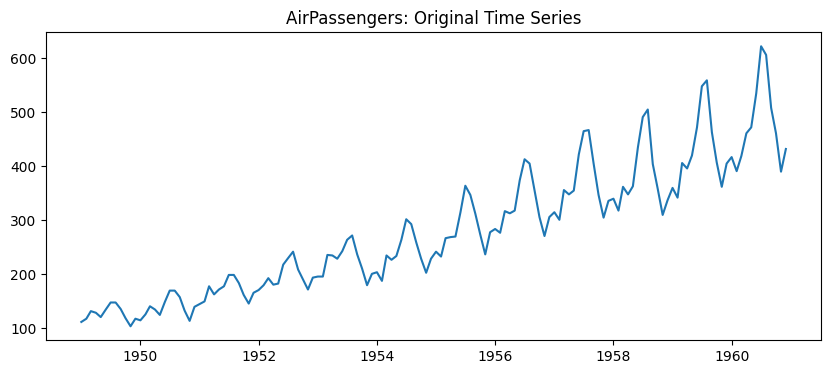

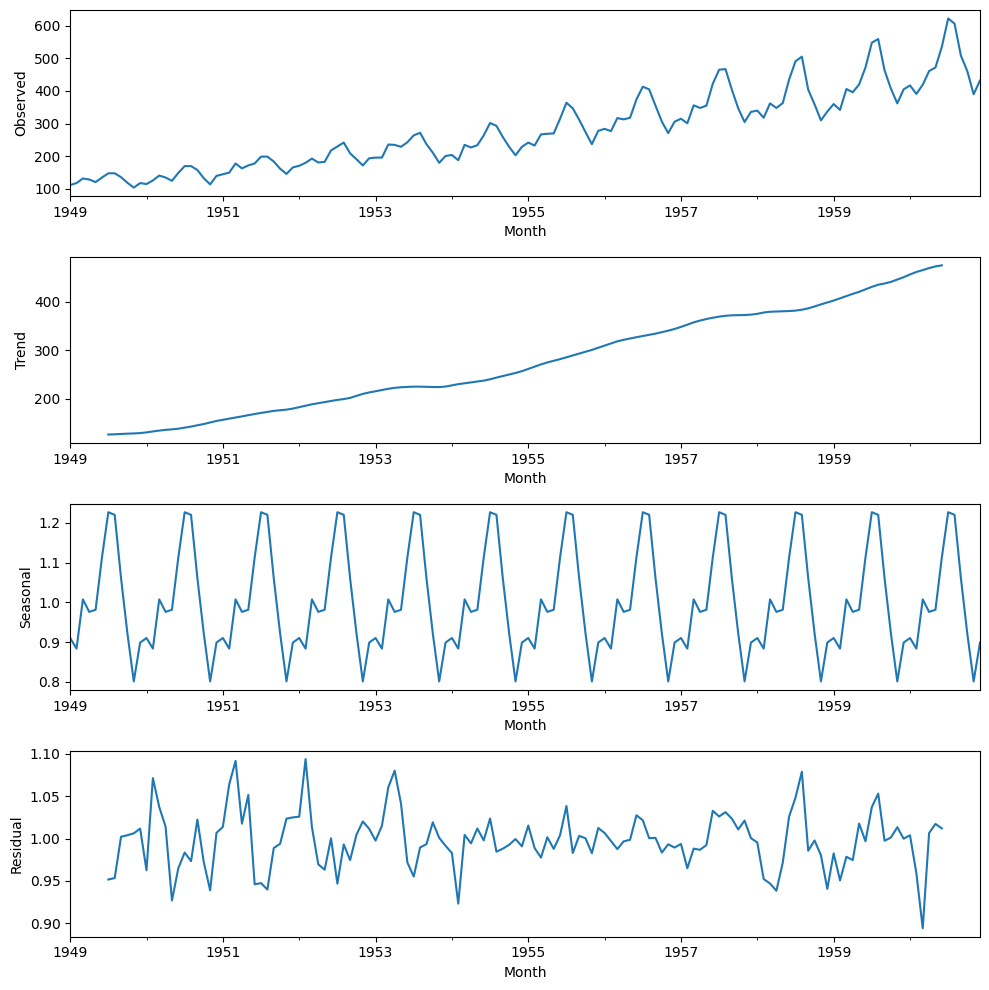

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and prepare data
df = pd.read_csv('/content/sample_data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot Original Series
plt.figure(figsize=(10, 4))
plt.plot(df['#Passengers'])
plt.title('AirPassengers: Original Time Series')
plt.savefig('original_series.png')

# Decomposition (Multiplicative)
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)

# Plot components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.savefig('decomposition.png')

7.Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

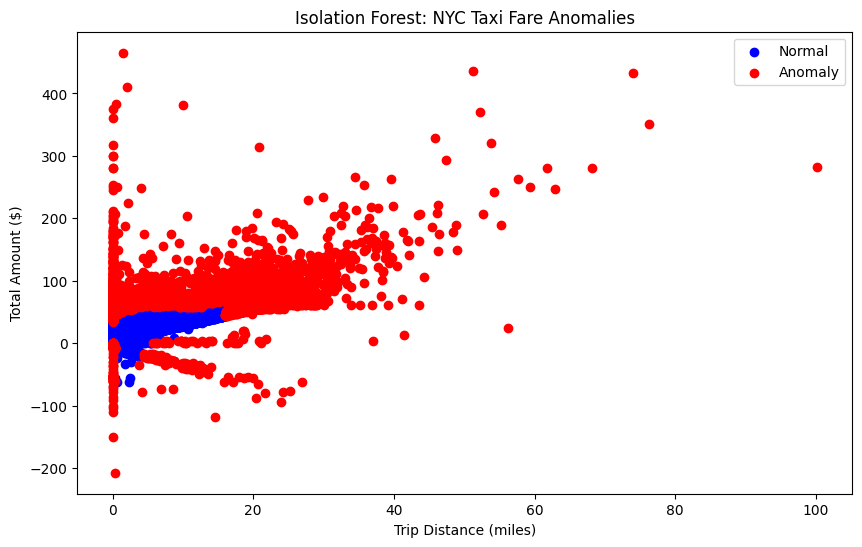

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load data
df = pd.read_csv('/content/sample_data/NYC_taxi_fare_data.csv')
X = df[['trip_distance', 'total_amount']].dropna()

# Detect anomalies
iso = IsolationForest(contamination=0.05, random_state=42)
X['anomaly'] = iso.fit_predict(X)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[X.anomaly == 1].trip_distance, X[X.anomaly == 1].total_amount, color='blue', label='Normal')
plt.scatter(X[X.anomaly == -1].trip_distance, X[X.anomaly == -1].total_amount, color='red', label='Anomaly')
plt.title('Isolation Forest: NYC Taxi Fare Anomalies')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.legend()
plt.savefig('taxi_anomalies.png')

8. Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

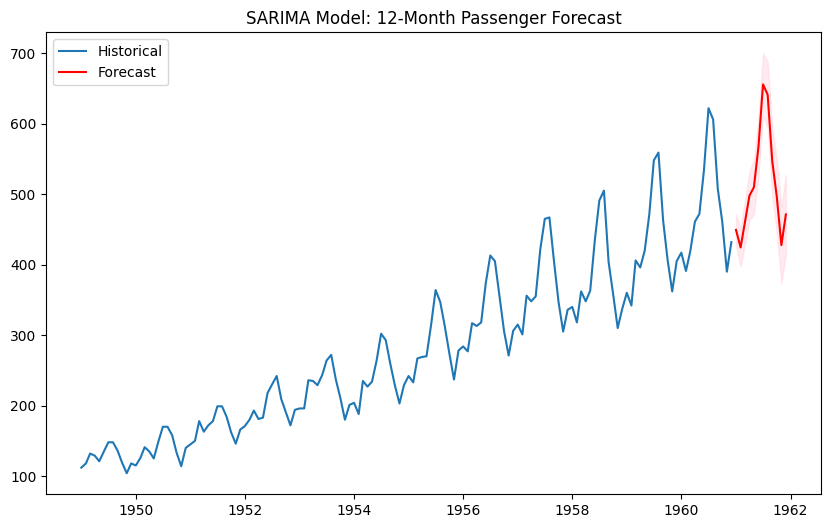

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv('/content/sample_data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.index.freq = 'MS'

# Fit SARIMA model
model = SARIMAX(df['#Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12).summary_frame()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['#Passengers'], label='Historical')
plt.plot(forecast['mean'], label='Forecast', color='red')
plt.fill_between(forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('SARIMA Model: 12-Month Passenger Forecast')
plt.legend()
plt.savefig('sarima_forecast.png')

9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


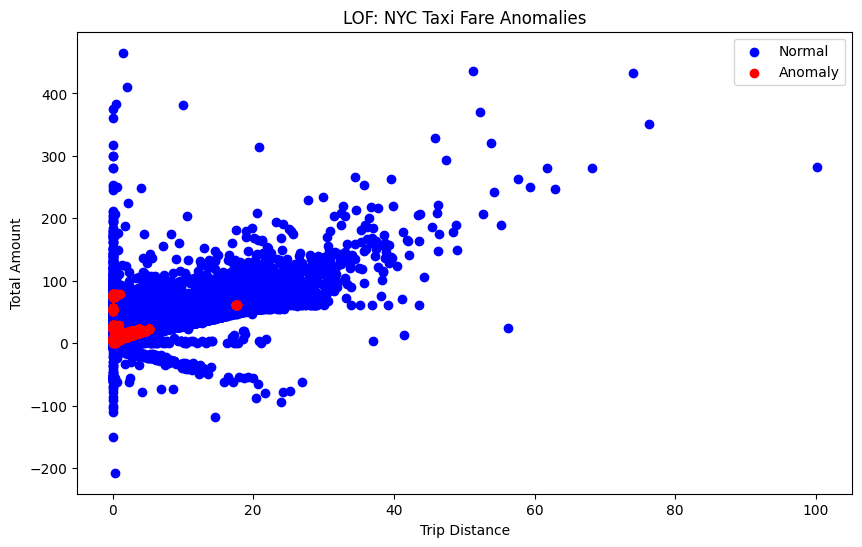

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load data
df = pd.read_csv('/content/sample_data/NYC_taxi_fare_data.csv')
X = df[['trip_distance', 'total_amount']].dropna()

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
X['anomaly'] = lof.fit_predict(X)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[X.anomaly == 1].trip_distance, X[X.anomaly == 1].total_amount, color='blue', label='Normal')
plt.scatter(X[X.anomaly == -1].trip_distance, X[X.anomaly == -1].total_amount, color='red', label='Anomaly')
plt.title('LOF: NYC Taxi Fare Anomalies')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.legend()
plt.savefig('taxi_lof_anomalies.png')

10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:

How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

How would you validate and monitor the performance over time?

How would this solution help business decisions or operations?

1. Real-Time Anomaly Detection

I would use Isolation Forest for this streaming context.

Why Isolation Forest? It is computationally efficient and works well with high-dimensional data (usage, weather, region). It isolates anomalies by randomly partitioning features; "spikes" or "drops" are easier to isolate and require fewer splits to reach.

Workflow: Use a sliding window approach. Instead of re-training on the whole history, the model is updated or applied to the most recent window of data to detect sudden deviations from the "norm" established in previous cycles.

2. Short-Term Forecasting Model

I would choose SARIMAX.

Why SARIMAX? * Seasonal (S): Energy usage has strong daily (96 periods for 15-min intervals) and weekly patterns.

Exogenous (X): Energy demand is highly sensitive to weather conditions (temperature, humidity). SARIMAX allows us to include these variables to improve accuracy significantly over standard ARIMA/SARIMA.

Application: It forecasts the next few hours to help the grid prepare for peak loads.

3. Validation and Monitoring

To ensure the system remains reliable, I would implement:

Walk-Forward Validation: Instead of a static split, I'd test the model by "unfolding" the data one step at a time, mimicking real-time arrival.

Metric Tracking: * Forecasting: Monitor MAPE (Mean Absolute Percentage Error) and RMSE.

Anomalies: Track the False Discovery Rate. If the grid triggers too many "false" alarms, the model needs re-calibration.

Concept Drift Detection: Use a tool (like ADWIN) to detect if the relationship between weather and energy has changed (e.g., due to a new large factory or seasonal shifts), triggering a model re-train.

4. Business and Operational Impact

Load Balancing: Accurate SARIMAX forecasts prevent over-generation (wasting money) or under-generation (leading to brownouts).

Infrastructure Protection: Isolation Forest identifies equipment failures or "surges" instantly, allowing engineers to reroute power before transformers blow.

Cost Optimization: Real-time insights allow the company to buy or sell power on the spot market at the most favorable prices.